# Some Examples of Geneologic Separation by Fatures

## Only from Lexicon Features:
## example1: 4 features group covering 101 languages
 * quality index: 3.34
 * dim1: 37%
 * dim2: 25%
 * fields: lexicon: 4
 * features:
       129A Hand and Arm
       136A M-T Pronouns
       136B M in First Person Singular
       137A N-M Pronouns
 * family1: 7 Pama-Nyungan 
 * family2: 6 Austronesian
 * separation: 0.15

In [1]:
library(FactoMineR)

In [2]:
family <- function(fams) {
    function(fam) {
        if (fam %in% fams) as.character(fam) else 'other'
    }
}

top2mca <-function(data,fams) {
    data$X <- NULL
    data$wals_code <- NULL
    data$iso_code <- NULL
    data$glottocode <- NULL
    data$countrycodes <- NULL
    data$Name <- NULL
    data$family <-  as.factor(sapply(data$family,family(fams)))
    ans <- list(
        'data' = data, 
        'marked' = which(data$family %in% fams),
        'mca' = MCA(data,quanti.sup=1:2,quali.sup=3:5)
    )
    ans
}

In [3]:
example1 <- read.csv('../miscsv/example1.csv')
mca1 <- top2mca(example1,c('Pama-Nyungan','Indo-European'))

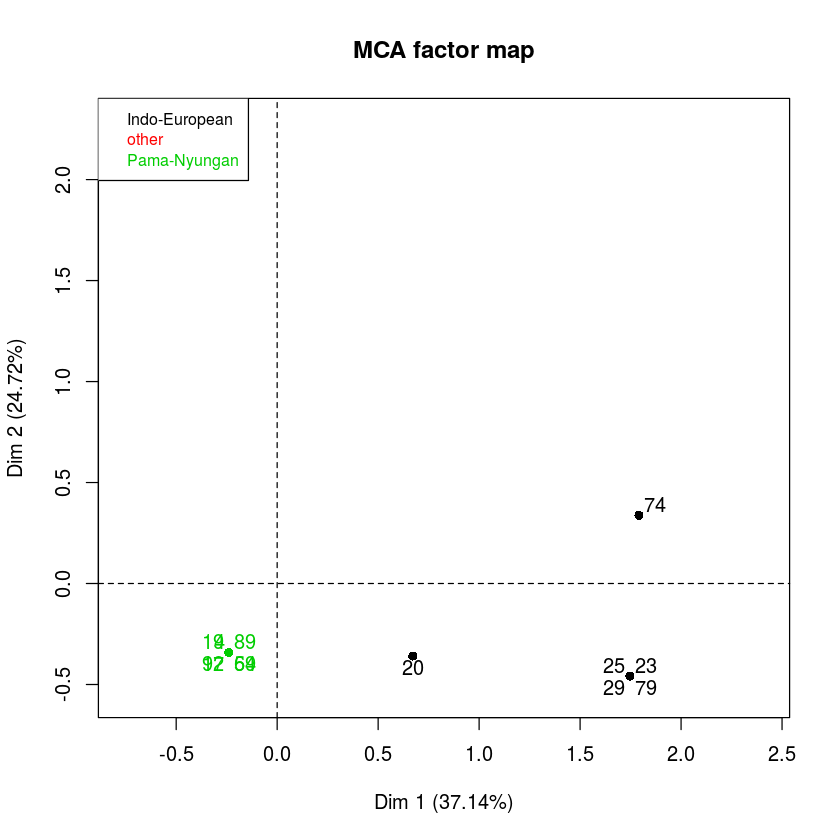

In [4]:
plot(mca1$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca1$marked,unselect=1)

In [5]:
mca1$mca$var$cos2

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
1 Identical,0.002939507,0.6141781017,0.001066747,0.3818027016,1.294265e-05
2 Different,0.002939507,0.6141781017,0.001066747,0.3818027016,1.294265e-05
1 No M-T pronouns,0.833500154,0.0047397121,0.054206076,0.0006011135,1.069529e-01
"2 M-T pronouns, paradigmatic",0.833500154,0.0047397121,0.054206076,0.0006011135,1.069529e-01
1 No m in first person singular,0.862806356,0.0002250777,0.025695183,0.0000637941,1.112096e-01
2 m in first person singular,0.862806356,0.0002250777,0.025695183,0.0000637941,1.112096e-01
1 No N-M pronouns,0.049326612,0.3591075010,0.403734591,0.1878256004,5.695526e-06
"2 N-M pronouns, paradigmatic",0.137074960,0.0414470166,0.809761405,0.0113152177,4.014011e-04
"3 N-M pronouns, non-paradigmatic",0.033881771,0.5357290480,0.078660988,0.3510110299,7.171631e-04


## example2: 4 features group covering 101 languages
 * quality index: 3.13
 * dim1: 35%
 * dim2: 25%
 * fields: lexicon: 4
 * features:
       129A Hand and Arm
       136B M in First Person Singular
       137A N-M Pronouns
       137B M in Second Person Singular
 * family1: 7 Pama-Nyungan
 * family2: 6 Austronesian
 * best separation: 0.55 (1 dim)

In [6]:
example2 <- read.csv('../miscsv/example2.csv')
mca2 <- top2mca(example2,c('Pama-Nyungan','Indo-European'))

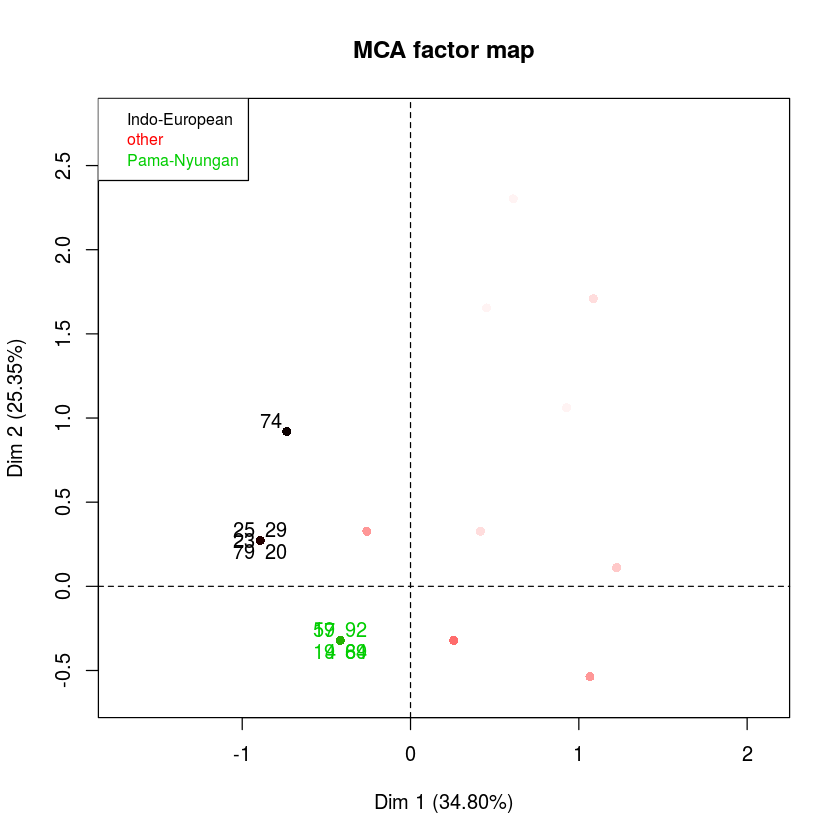

In [7]:
plot(mca2$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca2$marked,unselect=0.95)

### More Diverse with More Languages

### 4 long group covering 733 languages
 * quality index: 3.00
 * dim1: 14%
 * dim2: 11%
 * fields: 'word_order': 3, 'nominal_categories': 1
 * features:
        143G Minor morphological means of signaling negation  
        51A Position of Case Affixes
        83A Order of Object and Verb
        95A Relationship between the Order of Object and Verb and the Order of Adposition and Noun Phrase

 * family1: 95 (Austronesian), 
 * family2: 61 (Sino-Tibetan), 
 * separation: 0.51


    

In [8]:
example3 <- read.csv('chunked-feature-sets/143G-51A-83A-95A-733.csv')
mca3 <- top2mca(example3,c('Austronesian','Sino-Tibetan'))

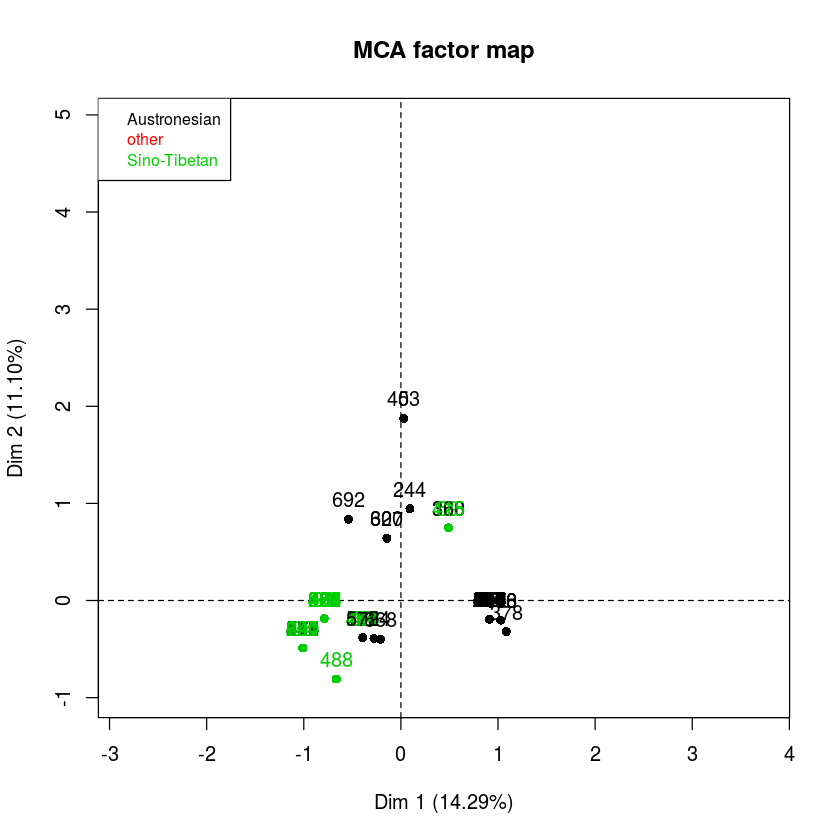

In [9]:
plot(mca3$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca3$marked,unselect=1)

### 4 long group covering 329 languages
 - quality index: 3.13
 - dim1: 13%
 - dim2: 9%
 - fields: 'verbal_categories': 2, 'morphology': 1, 'nominal_categories': 1
 - features:
       26A Prefixing vs. Suffixing in Inflectional Morphology
       33A Coding of Nominal Plurality
       69A Position of Tense-Aspect Affixes
       70A The Morphological Imperative
 - family1: 32 (Indo-European) 
 - family2: 27 (Austronesian)
 - best separation: 0.6 (on one dimension)

In [10]:
example4  <- read.csv('chunked-feature-sets/26A-33A-69A-70A-329.csv')
mca4 <- top2mca(example4,c('Indo-European','Austronesian'))

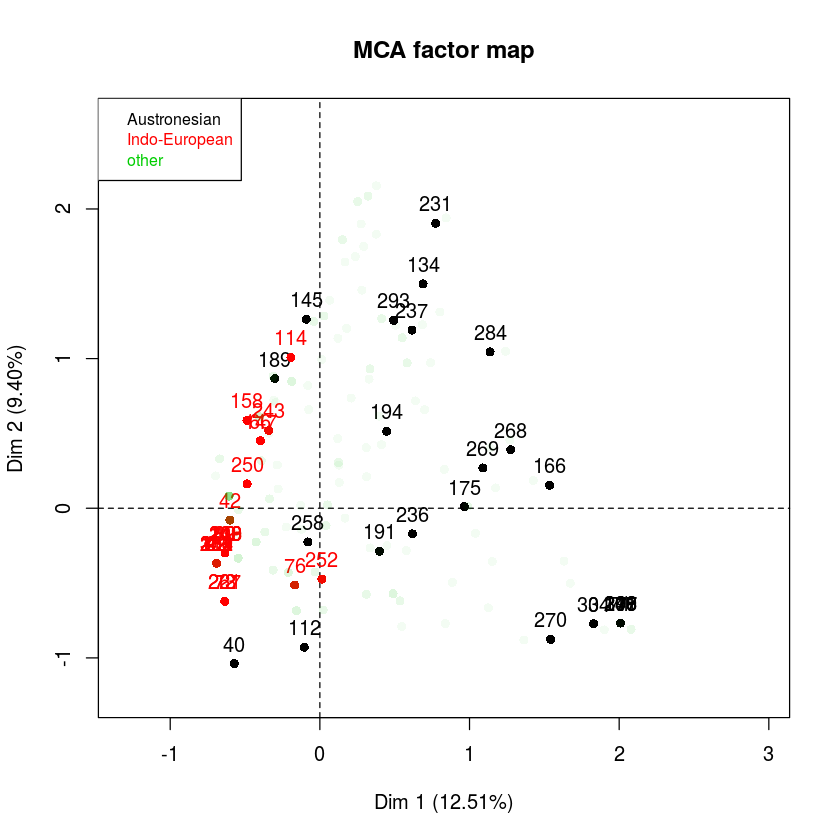

In [11]:
plot(mca4$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca4$marked,unselect=0.95)

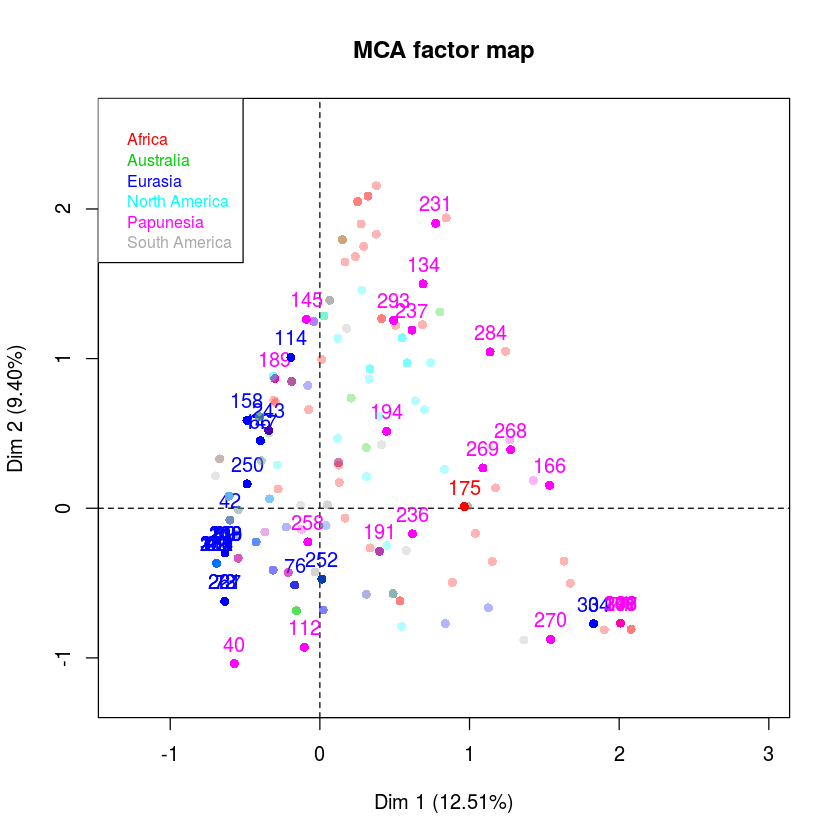

In [12]:
plot(mca4$mca,choix="ind",habillage="macroarea",invisible=c("var","quali.sup"),select=mca4$marked)

In [13]:
mca4$data[c(304,270),]

,latitude,longitude,genus,family,macroarea,X26A,X33A,X69A,X70A
304,8.00000,98.33333,Malayo-Sumbawan,Austronesian,Eurasia,1 Little affixation,9 No plural,5 No tense-aspect inflection,5 No second-person imperatives
270,-17.66667,-149.58333,Oceanic,Austronesian,Papunesia,1 Little affixation,7 Plural word,5 No tense-aspect inflection,4 Second person number-neutral


This is beginning to look like something I think. Let's throw the third language in:

In [14]:
mca5 <- top2mca(example4,c('Indo-European','Austronesian','Niger-Congo'))

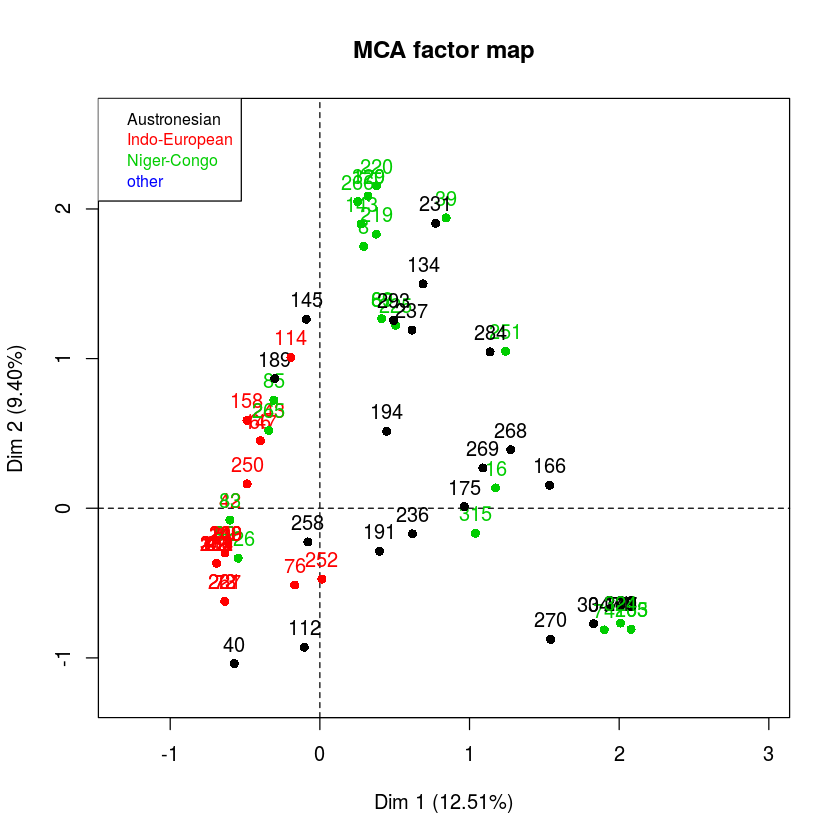

In [15]:
plot(mca5$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca5$marked,unselect="transparent")

## More Features (smaller silhouette score)
### 11 features group covering 518 languages
* quality index: 3.82
* dim1: 7%
* dim2: 7%
* fields: 'phonology': 11
* features:
      11A Front Rounded Vowels
      13A Tone
      18A Absence of Common Consonants
      19A Presence of Uncommon Consonants
      1A Consonant Inventories
      2A Vowel Quality Inventories
      4A Voicing in Plosives and Fricatives
      5A Voicing and Gaps in Plosive Systems
      6A Uvular Consonants
      7A Glottalized Consonants
      8A Lateral Consonants
* family1: 53 (Niger-Congo), 
* family2: 42 (Austronesian), 
* best separation: 0.45 (on one dimension)


In [16]:
example5  <- read.csv('chunked-feature-sets/11A-13A-18A-19A-1A-2A-4A-5A-6A-7A-8A-518.csv')
mca5 <- top2mca(example5,c('Niger-Congo','Austronesian'))

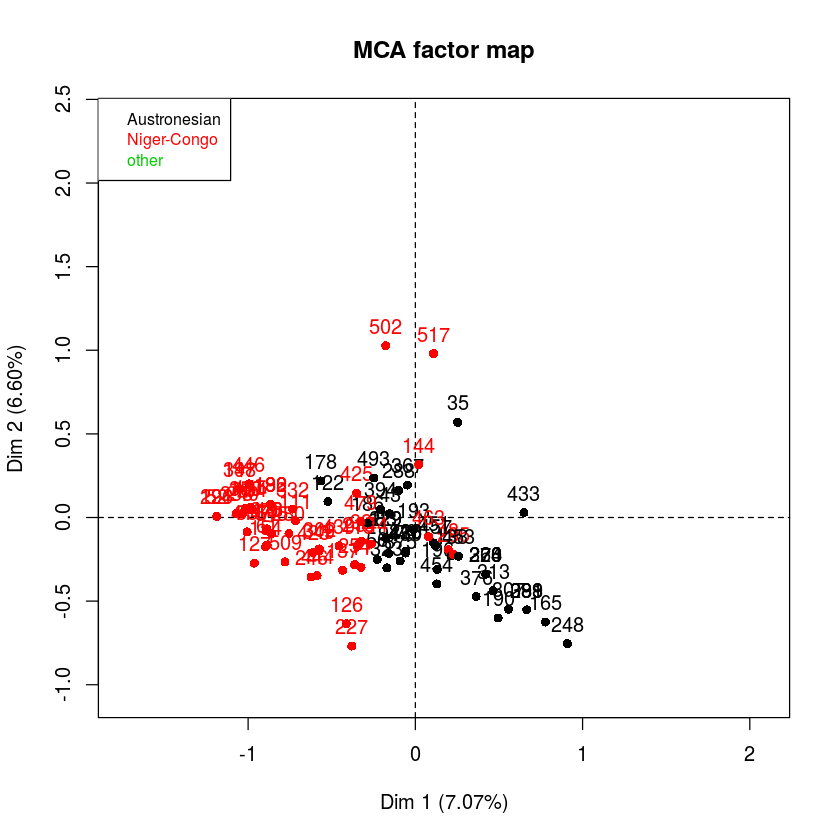

In [17]:
plot(mca5$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca5$marked,unselect=1)

In [18]:
mca5$mca$var$eta2

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X11A,0.05963735,0.002749595,0.1032952,0.04876984,0.01315881
X13A,0.24547666,0.001137345,0.2250274,0.28153251,0.02703768
X18A,0.21480723,0.165450688,0.1938826,0.09272376,0.21481677
X19A,0.27606937,0.354634025,0.2011175,0.23065942,0.20663374
X1A,0.22986453,0.642913113,0.1453787,0.13588548,0.08969950
X2A,0.44207842,0.035362956,0.1373798,0.07241654,0.11111281
X4A,0.56909640,0.122415046,0.2069455,0.22084879,0.15728076
X5A,0.53781859,0.051977481,0.1315938,0.15109192,0.18994839
X6A,0.07970961,0.447760799,0.0430892,0.05836083,0.10734859
X7A,0.21535471,0.550615825,0.1568726,0.29998619,0.27076595


In [19]:
mca6 <- top2mca(example5,c('Indo-European','Austronesian','Niger-Congo'))

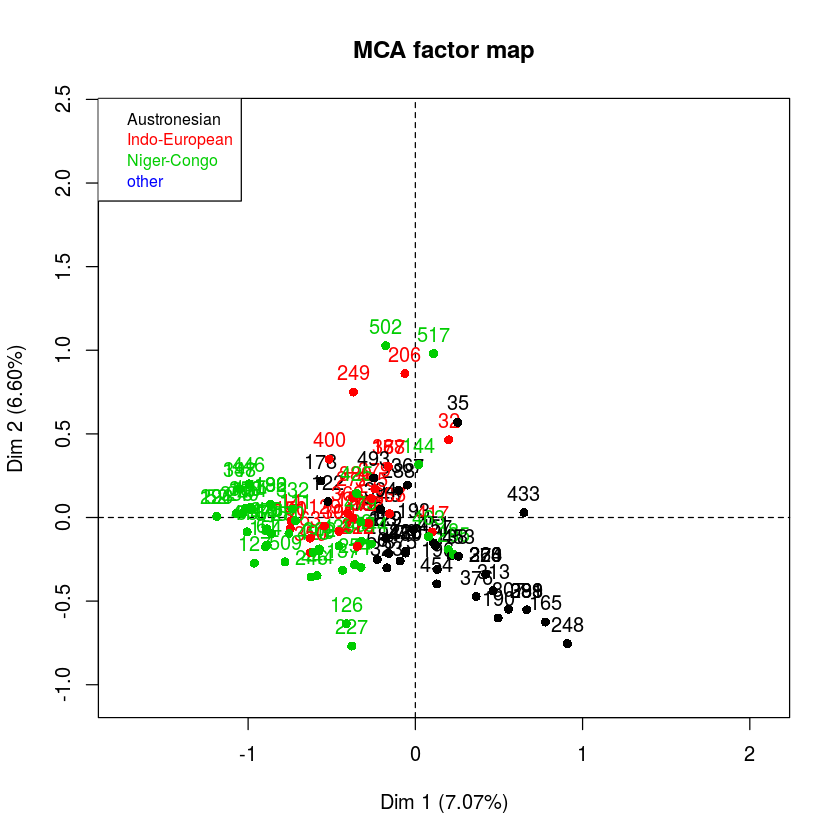

In [20]:
plot(mca6$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca6$marked,unselect=1)

## 5 features group covering 433 languages
* quality index: 3.47
* dim1: 11%
* dim2: 8%
* fields: 'nominal_categories': 3, 'verbal_categories': 1, 'morphology': 1
* features:
      26A Prefixing vs. Suffixing in Inflectional Morphology
      33A Coding of Nominal Plurality
      37A Definite Articles
      51A Position of Case Affixes
      69A Position of Tense-Aspect Affixes
* family1: 50 (Austronesian), 
* family2: 41 (Indo-European), 
* best separation: 0.6 (on one dimension)


In [21]:
example6  <- read.csv('chunked-feature-sets/26A-33A-37A-51A-69A-433.csv')
mca7 <- top2mca(example6,c('Indo-European','Austronesian'))

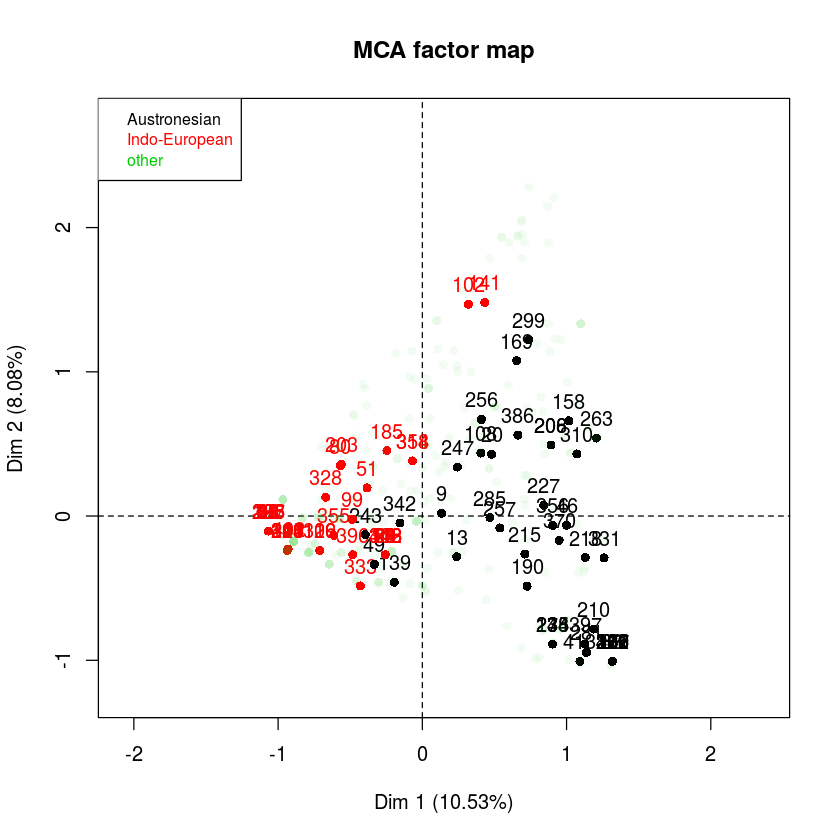

In [22]:
plot(mca7$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca7$marked,unselect=0.95)

In [23]:
mca8 <- top2mca(example6,c('Austronesian','Indo-European','Niger-Congo','Afro-Asiatic'))

In [24]:
mca8$mca$var$eta2

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X26A,0.8052184,0.67005086,0.4443623,0.14670128,0.4483123
X33A,0.5788467,0.54053183,0.3192848,0.49928071,0.3826593
X37A,0.2307533,0.02376622,0.3086098,0.20998172,0.1898739
X51A,0.6256778,0.41096355,0.2694472,0.55583244,0.2092731
X69A,0.7071752,0.61805704,0.3911715,0.03902391,0.0378283


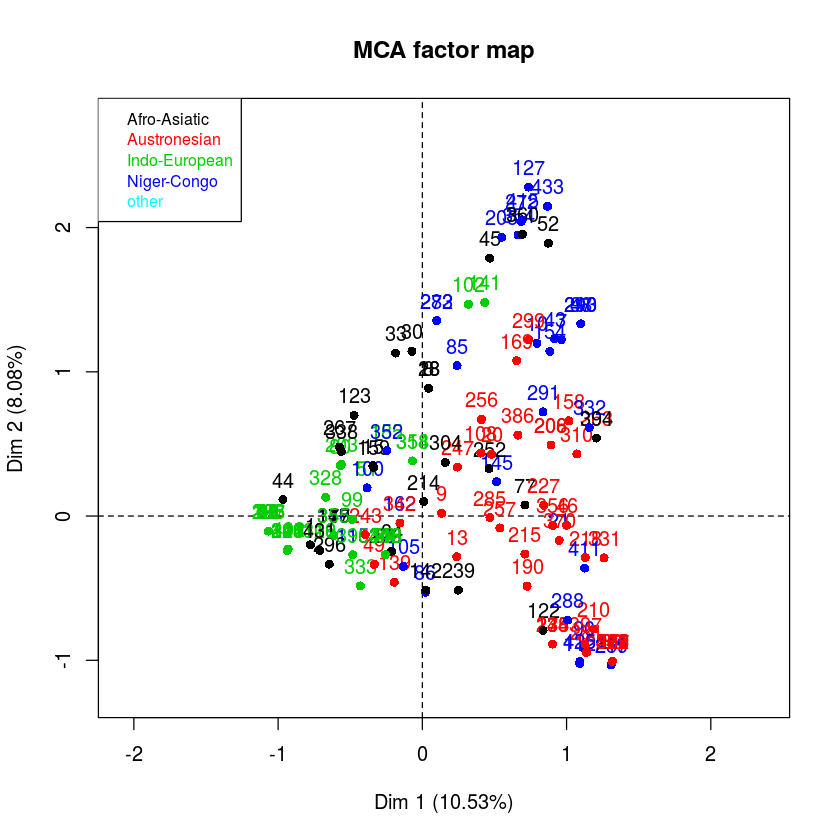

In [25]:
plot(mca8$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca8$marked,unselect=1)

## Small Group, a lot more languages
### 3 features group covering 1147 languages
 * quality index: 2.85
 * dim1: 11%
 * dim2: 10%
 * fields: 'word_order': 2, 'simple_clauses': 1
 * features:
       112A Negative Morphemes
       143A Order of Negative Morpheme and Verb
       143F Postverbal Negative Morphemes
 * family1: 157 (Niger-Congo), 
 * family2: 119 (Austronesian), 
 * best separation: 0.28 (on one dimension)



In [37]:
example7 <- read.csv('chunked-feature-sets/112A-143A-143F-1147.csv')
mca9 <- top2mca(example7,c('Niger-Congo','Austronesian'))

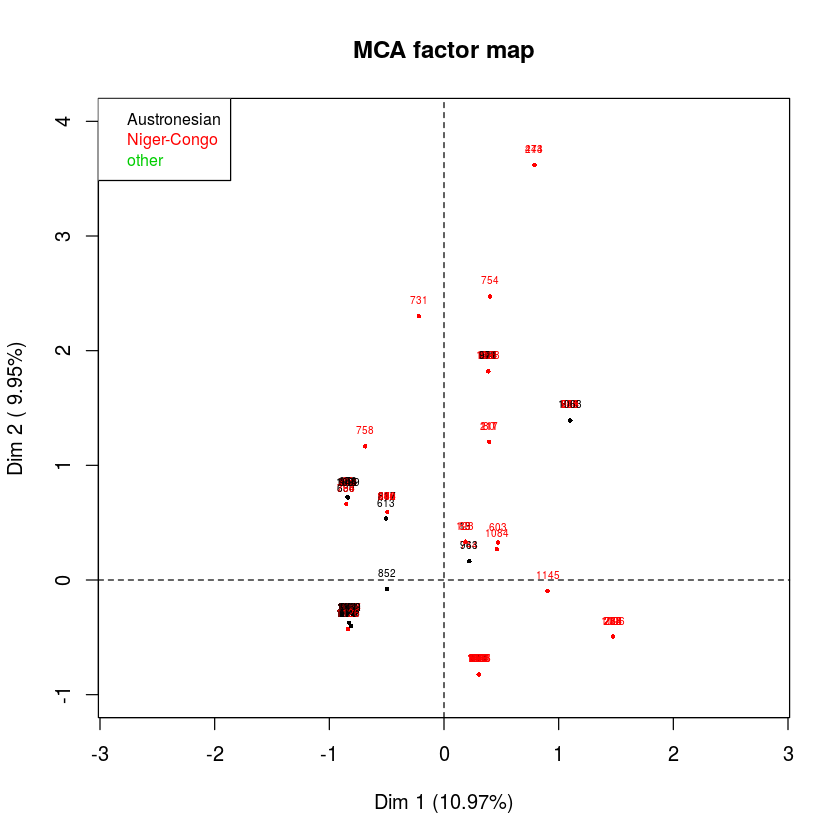

In [42]:
plot(mca9$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),
     select=mca9$marked,unselect=1,label=NULL,xlim=c(-2,2),ylim=c(-1,4),cex=0.5)